<a href="https://colab.research.google.com/github/shreyamin29/food-sales-predictions/blob/main/food_sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = [10, 6]

filename = '/content/sales_predictions.csv'
%config InlineBackend.figure_format = 'retina'

In [ ]:
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df.info() #this gives you basic information about a dataset. there are 8523 rows and 12 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df.dtypes # data types of each column can be obtained by dtypes 

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
df.duplicated().any() #there are no duplicate entries in the data set 

False

In [ ]:
df.value_counts()

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type     Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  Outlet_Type        Item_Outlet_Sales
NCZ54            14.650       Low Fat           0.083699         Household     163.4552  OUT018             2009                       Medium       Tier 3                Supermarket Type2  2599.2832            1
FDJ04            18.000       Low Fat           0.124452         Frozen Foods  118.5124  OUT046             1997                       Small        Tier 1                Supermarket Type1  1303.6364            1
FDJ15            11.350       Regular           0.023322         Dairy         182.5608  OUT046             1997                       Small        Tier 1                Supermarket Type1  3307.6944            1
                                                0.023359         Dairy         184.4608  OUT049             1999                       Medium       Tier 1   

In [ ]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
df['Item_Weight'].mean()

12.857645184136183

In [ ]:
df.groupby(['Outlet_Size'])[['Outlet_Size']].count()

,Outlet_Size
Outlet_Size,
High,932
Medium,2793
Small,2388


In [ ]:
df['Item_Weight'].fillna(12.858, inplace = True) # missing values for Item Weight are replaced by the average weight of the available values. 17.16% values were missing.
#the average for Item Weight changed from 12.8576 to 12.8577. A very small impact for entering average weight for missing values
df['Outlet_Size'].fillna('Medium', inplace = True) # 28% of values were missing. Imputing 'Medium' as the available data shows almost 33% stores are Medium. 
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
df['Item_Weight'].mean() # the average for Item Weight changed from 12.8576 to 12.8577. A very small impact for entering average weight for missing values

12.857706089404992

In [ ]:
df.groupby(['Item_Fat_Content'])[['Item_Fat_Content']].count()

,Item_Fat_Content
Item_Fat_Content,
LF,316
Low Fat,5089
Regular,2889
low fat,112
reg,117


In [ ]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['LF', 'low fat'],'Low Fat') #data inconsitency in Item Fat Content field are removed and brought in line
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['reg'],'Regular') # the replace function was referenced from https://datatofish.com/replace-values-pandas-dataframe/
df.groupby(['Item_Fat_Content'])[['Item_Fat_Content']].count()

,Item_Fat_Content
Item_Fat_Content,
Low Fat,5517
Regular,3006


In [ ]:
df.describe() #describe function provides statistical calculations for numerical columns/values in a data set 
# information on this function was provided on https://www.w3resource.com/pandas/dataframe/dataframe-describe.php

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857706,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.858000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


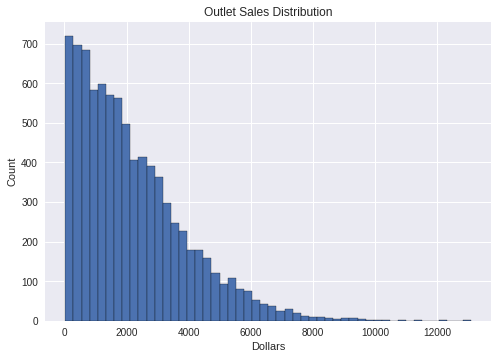

In [ ]:
#histogram to view the distribution of outet sales in the dataset
df['Item_Outlet_Sales'].hist(bins = 50, edgecolor = 'black') 
plt.style.use('seaborn')
plt.xlabel('Dollars')
plt.ylabel('Count')
plt.title('Outlet Sales Distribution')
plt.ticklabel_format(useOffset=False, style='plain')

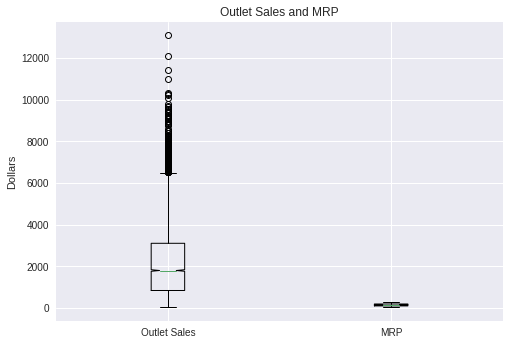

In [ ]:
#x = df['Item_Weight']
y = df['Item_Outlet_Sales'] #storing subset values in variables for box plot
z = df['Item_MRP']
plt.boxplot([y,z], notch=True, labels=['Outlet Sales', 'MRP'])
plt.title('Outlet Sales and MRP')
plt.ylabel('Dollars')
plt.show()
#

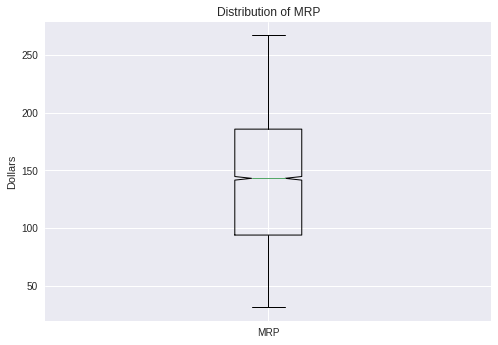

In [ ]:
x =df['Item_MRP']
plt.boxplot([x], notch=True, labels=['MRP'])
plt.title('Distribution of MRP')
plt.ylabel('Dollars')
plt.show()

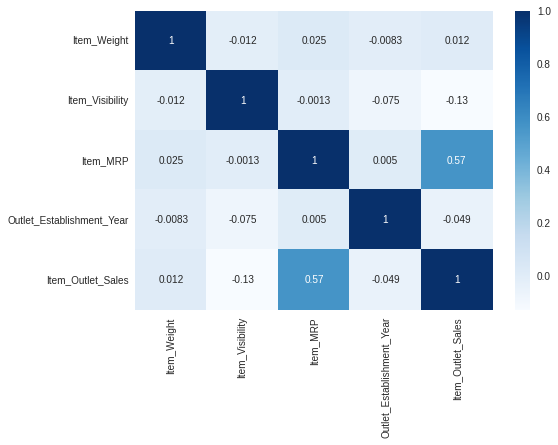

In [ ]:
corr = df.corr()
sns.heatmap(corr, cmap = 'Blues', annot=True); #as per the heatmap there is a moderate corelation between Item_MRP and Item_Outlet_Sales

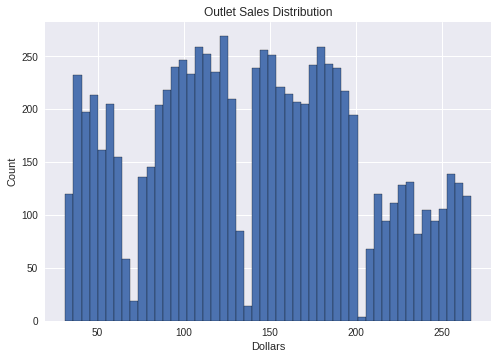

In [ ]:
#histogram to view the distribution of outet sales in the dataset
df['Item_MRP'].hist(bins = 50, edgecolor = 'black') 
plt.style.use('seaborn')
plt.xlabel('Dollars')
plt.ylabel('Count')
plt.title('Outlet Sales Distribution')
plt.ticklabel_format(useOffset=False, style='plain')

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


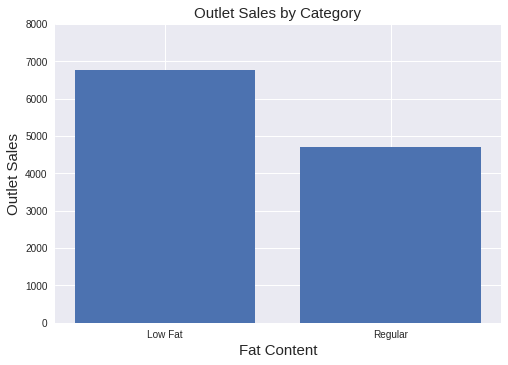

In [ ]:
#bar chart shows low fat item sold more than regular fat items

fat_type = df['Item_Fat_Content']
mrp = df['Item_Outlet_Sales']

plt.bar(fat_type[0:100], mrp[0:100])

plt.xlabel('Fat Content', fontsize = 15)
plt.ylabel('Outlet Sales', fontsize = 15)
plt.ylim(0,8000)
plt.title('Outlet Sales by Category', fontsize = 15)
plt.show()